In [93]:
# %pip install openpyxl
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [94]:
import os
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import joblib


In [95]:
excel_path = os.path.abspath('.\Inputs\SMM\Training For Calibration.xlsx')
dataframe = pd.read_excel(excel_path)

<>:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
<>:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
C:\Users\siddh\AppData\Local\Temp\ipykernel_6680\267992457.py:1: SyntaxWarning: "\I" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\I"? A raw string is also an option.
  excel_path = os.path.abspath('.\Inputs\SMM\Training For Calibration.xlsx')


In [96]:
g_value = dataframe[['Moisture Content (%)']]
s_value = dataframe[['New Sensor 2']]

In [98]:
model = Pipeline([
        ("rf", RandomForestRegressor(
        n_estimators=300,
        random_state=14
    ))
])

In [99]:

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=14)

In [100]:
rmse_scorer = make_scorer(
    lambda yt, yp: np.sqrt(mean_squared_error(yt, yp)),
    greater_is_better=False
)

scoring = {
    "rmse": rmse_scorer,
    "r2": make_scorer(r2_score)
}

scoring

{'rmse': make_scorer(<lambda>, greater_is_better=False, response_method='predict'),
 'r2': make_scorer(r2_score, response_method='predict')}

In [101]:
cv_results = cross_validate(model, s_value, g_value, cv=cv, scoring=scoring, return_train_score=True)

# Note: rmse is negative because of sklearn convention when "greater_is_better=False"
rmse_scores = -cv_results["test_rmse"]
r2_scores = cv_results["test_r2"]

print(f"K-Fold RMSE: median={np.median(rmse_scores):.4f}, std={rmse_scores.std():.4f}")
print(f"K-Fold R2  : median={np.median(r2_scores):.4f}, std={r2_scores.std():.4f}")

d:\AHRC\Irrigation_Git\Lag_adjustment\.venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\AHRC\Irrigation_Git\Lag_adjustment\.venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\AHRC\Irrigation_Git\Lag_adjustment\.venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\AHRC\Irrigation_Git\Lag_adjustment\.venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed whe

K-Fold RMSE: median=3.3820, std=0.5951
K-Fold R2  : median=0.3896, std=1.9997


In [102]:
rmse_scores = -cv_results["test_rmse"]  # flip sign back to positive RMSE
r2_scores = cv_results["test_r2"]

print(f"K-Fold RMSE: mean={rmse_scores.mean():.4f}, std={rmse_scores.std():.4f}")
print(f"K-Fold R2  : mean={r2_scores.mean():.4f}, std={r2_scores.std():.4f}")

print("\nPer-fold RMSE:", rmse_scores)
print("Per-fold R2:", r2_scores)

K-Fold RMSE: mean=3.2636, std=0.5951
K-Fold R2  : mean=-0.6434, std=1.9997

Per-fold RMSE: [3.38204426 2.55957156 4.09936834 3.65382512 2.62309271]
Per-fold R2: [ 0.38964237  0.42854123 -4.63766988  0.16259221  0.43988705]


In [73]:
final_model = model.fit(s_value, g_value)

d:\AHRC\Irrigation_Git\Lag_adjustment\.venv\Lib\site-packages\sklearn\base.py:1336: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


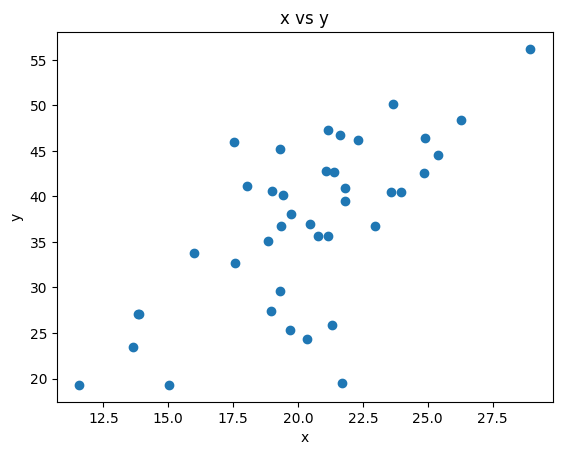

In [103]:
plt.figure()
plt.scatter(dataframe[["Moisture Content (%)"]], dataframe[["New Sensor 2"]])
plt.xlabel("x")
plt.ylabel("y")
plt.title("x vs y")
plt.show()


In [104]:
joblib.dump(final_model, "rf_model.pkl")
print("Model saved!")


Model saved!


In [ ]:
loaded_model = joblib.load("rf_model.pkl")

# Predict y for a new x value
new_x = 7.5
pred = loaded_model.predict([[new_x]])

print("x =", new_x)
print("Predicted y =", pred[0])

x = New Sensor 2, Predicted y = 23.105195583178702


d:\AHRC\Irrigation_Git\Lag_adjustment\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [107]:
loaded_model = joblib.load("rf_model.pkl")

# Predict y for a new x value
new_x = np.array(s_value)
pred = loaded_model.predict(new_x)

print("x =", new_x)
print("Predicted y =", pred)

x = [[44.6]
 [42.6]
 [46.4]
 [50.1]
 [56.2]
 [40.5]
 [36.8]
 [48.4]
 [35.7]
 [29.6]
 [35.1]
 [36.7]
 [33.8]
 [19.3]
 [23.5]
 [27.1]
 [27.1]
 [19.3]
 [46. ]
 [39.5]
 [42.7]
 [37. ]
 [27.4]
 [25.9]
 [41.2]
 [45.2]
 [47.3]
 [24.3]
 [42.8]
 [25.3]
 [46.8]
 [46.2]
 [40.9]
 [35.6]
 [19.5]
 [40.2]
 [32.7]
 [40.6]
 [38.1]
 [40.5]]
Predicted y = [23.10519558 23.56250954 23.49442246 23.91844672 27.07574546 23.21404817
 21.89858673 24.25903863 20.65351367 18.61389014 19.55693714 20.41054372
 16.8373073  14.19811096 15.91763956 14.691974   14.691974   14.19811096
 19.3663059  21.42594326 21.60497374 20.96424624 17.64360236 20.33891867
 19.35898868 20.5367482  21.67564294 18.55011586 21.4838753  19.80592611
 22.1842619  21.08625599 20.76069569 20.80682271 19.05641018 20.71151581
 17.40483417 20.59133021 20.20582415 23.21404817]


d:\AHRC\Irrigation_Git\Lag_adjustment\.venv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
X_new = np.array(x_values).reshape(-1, 1)

pred = loaded_model.predict(X_new)

for x, y_hat in zip(x_values, pred):
    print(f"x = {x}, Predicted y = {y_hat}")